In [1]:
import numpy as np
import pandas as pd
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
import os

from platform import python_version
import warnings
import time
import datetime as dt
from sklearn.metrics import classification_report, confusion_matrix
import multiprocessing as mp
import shutil

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.utils import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *

import pandas as pd
import numpy as np
import seaborn as sn

from PIL import Image
import xml.etree.ElementTree as ET
import psutil
import random

In [3]:

import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [4]:
import os
os.listdir("../input/dataforplant/PlantVillage")

['val', 'desktop.ini', 'train']

In [5]:
epochs = 15
batch_size = 32
testsplit = .2
targetx = 128
targety = 128
learning_rate = 0.0001
classes = 32
seed = random.randint(1, 1000)

data_dir = "../input/dataforplant/PlantVillage/train"
data_dir1 = "../input/dataforplant/PlantVillage/val"



testsplit = .2
datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        brightness_range=[0.9,1.1],
        horizontal_flip=True,
        validation_split=testsplit,
        preprocessing_function=preprocess_input
)

train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(targetx, targety),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True,
        seed=seed,
        subset="training"
)

test_generator = datagen.flow_from_directory(
        data_dir1,
        target_size=(targetx, targety),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False,
        seed=seed,
        subset="validation"
)

Found 24446 images belonging to 32 classes.
Found 1522 images belonging to 32 classes.


In [6]:
EPOCHS = 15
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((128,128))
image_size = 0
directory_root = '../input/dataforplant/PlantVillage'
width=128
height=128
depth=3

In [7]:
train_dir = os.path.join(directory_root, 'train')
val_dir = os.path.join(directory_root, 'val')

In [8]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:200]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error --- : {e}")
    
    
    
    # Transform the loaded training image data into numpy array
np_image_list = np.array(image_list, dtype=np.float16) / 225.0
print()

# Check the number of images loaded for training
image_len = len(image_list)
print(f"Total number of images: {image_len}")

[INFO] Loading images ...
[INFO] Processing Tomato___Late_blight ...
[INFO] Processing Tomato___healthy ...
[INFO] Processing Grape___healthy ...
[INFO] Processing Potato___healthy ...
[INFO] Processing Corn_(maize)___Northern_Leaf_Blight ...
[INFO] Processing Tomato___Early_blight ...
[INFO] Processing Tomato___Septoria_leaf_spot ...
[INFO] Processing Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot ...
[INFO] Processing Strawberry___Leaf_scorch ...
[INFO] Processing Apple___Apple_scab ...
[INFO] Processing Tomato___Tomato_Yellow_Leaf_Curl_Virus ...
[INFO] Processing Tomato___Bacterial_spot ...
[INFO] Processing Apple___Black_rot ...
[INFO] Processing Cherry_(including_sour)___Powdery_mildew ...
[INFO] Processing Apple___Cedar_apple_rust ...
[INFO] Processing background ...
[INFO] Processing Tomato___Target_Spot ...
[INFO] Processing Pepper,_bell___healthy ...
[INFO] Processing Grape___Leaf_blight_(Isariopsis_Leaf_Spot) ...
[INFO] Processing Potato___Late_blight ...
[INFO] Processin

In [9]:
image_size = len(image_list)
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)
print(label_binarizer.classes_)

['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Common_rust_' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Pepper,_bell___Bacterial_spot' 'Pepper,_bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy'
 'Strawberry___Leaf_scorch' 'Strawberry___healthy'
 'Tomato___Bacterial_spot' 'Tomato___Early_blight' 'Tomato___Late_blight'
 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' 'Tomato___Tomato_mosaic_virus'
 'Tomato___healthy' 'background']


In [10]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)

pickle.dump(label_binarizer,open('plant_disease_label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

print("Total number of classes: ", n_classes)

Total number of classes:  32


In [11]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = seed) 

[INFO] Spliting data to train, test


In [12]:
!pip install -U efficientnet
import efficientnet.keras as efn

     |████████████████████████████████| 50 kB 2.5 MB/s eta 0:00:01


In [13]:
from keras.models import Model

from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
import efficientnet.keras as efn
from keras.utils.np_utils import to_categorical

# Get the Efficient net model so we can do transfer learning
base_model = efn.EfficientNetB0(input_shape = (128,128, 3), include_top = False, weights = 'imagenet')
# Add a global spatial average pooling layer
out = base_model.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
predictions = Dense(n_classes, activation='softmax')(out)
model = Model(inputs=base_model.input, outputs=predictions)

# only if we want to freeze layers
for layer in base_model.layers:
    layer.trainable = False
    
# Compile 
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"]) 
model.summary()

16809984/16804768 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 64, 64, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 64, 64, 32)   128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 64, 64, 32)   0           stem_bn[0][0]                    
_____________________________

In [14]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [15]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=32),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // 32,
    epochs=EPOCHS , verbose=1
    )

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
135/135 [==============================] - 28s 144ms/step - loss: 2.0567 - accuracy: 0.4215 - val_loss: 0.8207 - val_accuracy: 0.7202
Epoch 2/15
135/135 [==============================] - 17s 124ms/step - loss: 0.7767 - accuracy: 0.7466 - val_loss: 0.7136 - val_accuracy: 0.7516
Epoch 3/15
135/135 [==============================] - 17s 129ms/step - loss: 0.6012 - accuracy: 0.7942 - val_loss: 0.6961 - val_accuracy: 0.7599
Epoch 4/15
135/135 [==============================] - 17s 123ms/step - loss: 0.5529 - accuracy: 0.8125 - val_loss: 0.6218 - val_accuracy: 0.7959
Epoch 5/15
135/135 [==============================] - 17s 129ms/step - loss: 0.4449 - accuracy: 0.8460 - val_loss: 0.6215 - val_accuracy: 0.7978
Epoch 6/15
135/135 [==============================] - 17s 124ms/step - loss: 0.4129 - accuracy: 0.8621 - val_loss: 0.5015 - val_accuracy: 0.8310
Epoch 7/15
135/135 [==============================] - 17s 123ms/step - loss: 0.4322 - accuracy: 0.8544 - val_loss: 0.5587 - val_ac

In [16]:
def Res_Plot_Test_Save(name):
    print("[INFO] Plotting model accuracy and Loss")
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    #Train and validation accuracy
    plt.plot(epochs, acc, 'b', label='Training accurarcy')
    plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
    plt.title('Training and Validation accurarcy')
    plt.legend()

    plt.figure()
    #Train and validation loss
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.legend()
    plt.show()
    
    print("[INFO] Calculating model accuracy")
    scores = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {scores[1]*100}")
    

[INFO] Plotting model accuracy and Loss


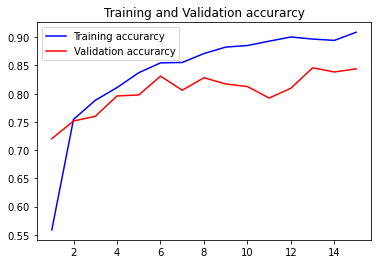

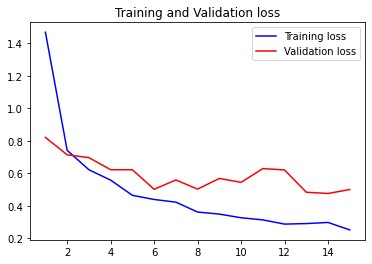

[INFO] Calculating model accuracy
34/34 [==============================] - 1s 21ms/step - loss: 0.4999 - accuracy: 0.8440
Test Accuracy: 84.39520001411438


In [17]:
Res_Plot_Test_Save('EfficientNet_Imagenet.h5')

In [18]:
disease_types=['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy','Cherry_(including_sour)___Powdery_mildew','Cherry_(including_sour)___healthy','Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy','Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Strawberry___Leaf_scorch','Strawberry___healthy','Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus','Tomato___Tomato_mosaic_virus','Tomato___healthy']

Text(0.5, 144.41374999999996, 'Predicted')

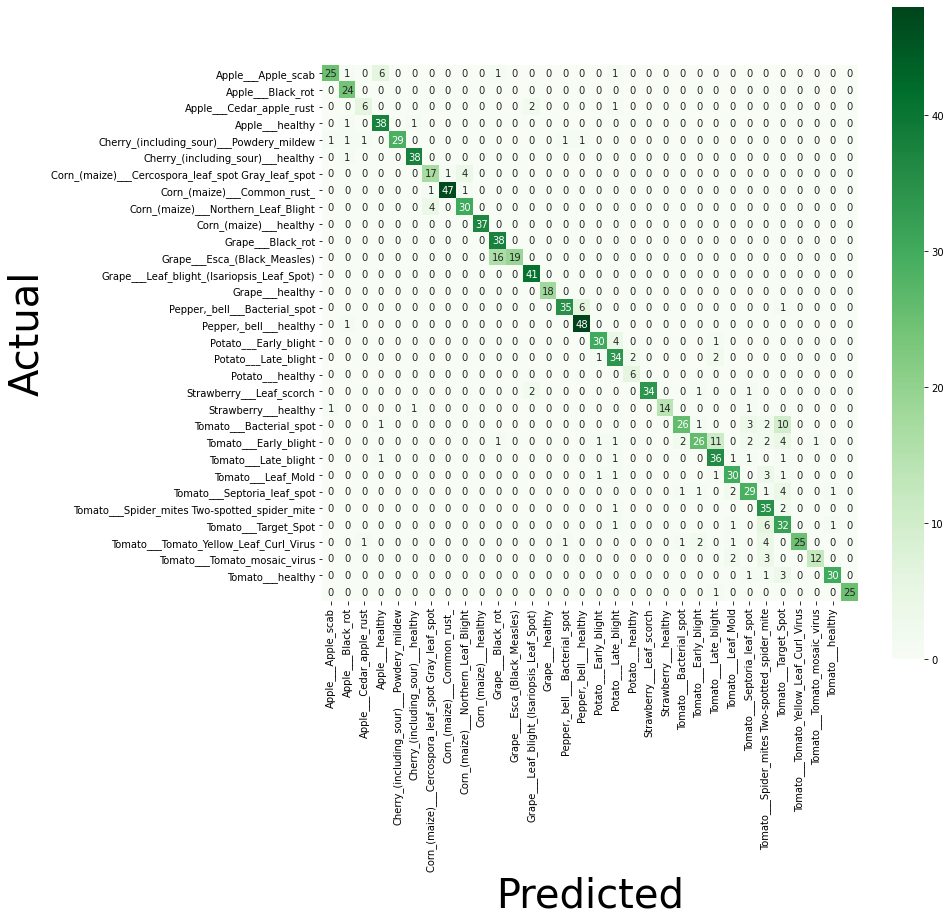

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
Y_pred = model.predict(x_test)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12,12))
ax = sns.heatmap( cm, cmap=plt.cm.Greens,annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [20]:
from keras.models import Model

from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
import efficientnet.keras as efn
from keras.utils.np_utils import to_categorical

# Get the Efficient net model so we can do transfer learning
base_modelb5 = efn.EfficientNetB6(input_shape = (128,128, 3), include_top = False, weights = 'imagenet')
# Add a global spatial average pooling layer
out = base_modelb5.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
predictions = Dense(n_classes, activation='softmax')(out)
model = Model(inputs=base_modelb5.input, outputs=predictions)

# only if we want to freeze layers
for layer in base_modelb5.layers:
    layer.trainable = False
    
# Compile 
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"]) 
model.summary()

165527552/165527152 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 64, 64, 56)   1512        input_2[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 64, 64, 56)   224         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 64, 64, 56)   0           stem_bn[0][0]                    
_________________________

In [21]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS , verbose=1
    )

Epoch 1/15
135/135 [==============================] - 41s 208ms/step - loss: 2.6156 - accuracy: 0.2528 - val_loss: 1.2738 - val_accuracy: 0.5937
Epoch 2/15
135/135 [==============================] - 24s 178ms/step - loss: 1.4617 - accuracy: 0.5487 - val_loss: 1.0827 - val_accuracy: 0.6482
Epoch 3/15
135/135 [==============================] - 23s 173ms/step - loss: 1.2473 - accuracy: 0.6014 - val_loss: 0.8449 - val_accuracy: 0.7248
Epoch 4/15
135/135 [==============================] - 23s 173ms/step - loss: 1.0626 - accuracy: 0.6504 - val_loss: 0.8468 - val_accuracy: 0.7138
Epoch 5/15
135/135 [==============================] - 24s 177ms/step - loss: 0.9658 - accuracy: 0.6703 - val_loss: 0.7377 - val_accuracy: 0.7553
Epoch 6/15
135/135 [==============================] - 24s 179ms/step - loss: 0.9174 - accuracy: 0.6854 - val_loss: 0.8127 - val_accuracy: 0.7230
Epoch 7/15
135/135 [==============================] - 24s 175ms/step - loss: 0.8802 - accuracy: 0.7071 - val_loss: 0.6879 - val_ac

In [22]:
def Res_Plot_Test_Save(name):
    print("[INFO] Plotting model accuracy and Loss")
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    #Train and validation accuracy
    plt.plot(epochs, acc, 'b', label='Training accurarcy')
    plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
    plt.title('Training and Validation accurarcy')
    plt.legend()

    plt.figure()
    #Train and validation loss
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.legend()
    plt.show()
    
    print("[INFO] Calculating model accuracy")
    scores = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {scores[1]*100}")
    

[INFO] Plotting model accuracy and Loss


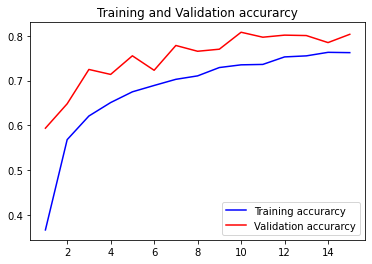

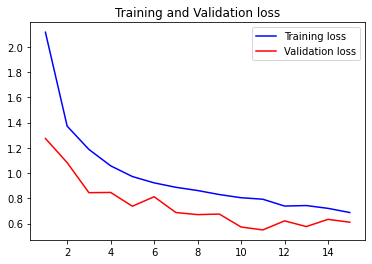

[INFO] Calculating model accuracy
34/34 [==============================] - 3s 94ms/step - loss: 0.6111 - accuracy: 0.8033
Test Accuracy: 80.33241033554077


In [23]:
Res_Plot_Test_Save('EfficientNetB6_Imagenet.h5')

In [24]:
from keras.models import Model
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
import efficientnet.keras as efn
from keras.utils.np_utils import to_categorical

# Get the Efficient net model so we can do transfer learning
base_model = efn.EfficientNetB7(input_shape = (128,128,3), include_top = False, weights = 'imagenet')
# Add a global spatial average pooling layer
out = base_model.output
out = GlobalAveragePooling2D()(out)

out = Dense(1024, activation='relu')(out)
predictions = Dense(n_classes, activation='softmax')(out)
model = Model(inputs=base_model.input, outputs=predictions)

# only if we want to freeze layers
for layer in base_model.layers:
    layer.trainable = True
    
# Compile 
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"]) 
model.summary()

258441216/258434480 [==============================] - 2s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 64, 64, 64)   1728        input_3[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 64, 64, 64)   256         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 64, 64, 64)   0           stem_bn[0][0]                    
_________________________

In [25]:

base_model = efn.EfficientNetB7(input_shape = (128,128,3), include_top = False, weights = 'imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(1280, activation='relu',  kernel_initializer=glorot_uniform(seed), bias_initializer='zeros')(x)
x = BatchNormalization()(x)
predictions = Dense(classes, activation='softmax', kernel_initializer='random_uniform', bias_initializer='zeros')(x)

model = Model(inputs=base_model.input, outputs=predictions)
optimizer = Adam(lr=learning_rate)
loss = "categorical_crossentropy"

for layer in model.layers:
    layer.trainable = True

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=["accuracy"])

model.summary()
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 64, 64, 64)   1728        input_4[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 64, 64, 64)   256         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 64, 64, 64)   0           stem_bn[0][0]                    
____________________________________________________________________________________________

In [26]:
checkpoint = ModelCheckpoint('dog_breed_classifier.h5',
                             monitor='val_accuracy',
                             save_best_only=True,
                             verbose=1,
                             mode='auto',
                             save_weights_only=False,
                             period=1)

tensorboard = TensorBoard(log_dir="./logs-"+dt.datetime.now().strftime("%m%d%Y%H%M%S"),
                            histogram_freq=0,
                            batch_size=batch_size,
                            write_graph=False,
                            update_freq='epoch')

def epoch_end(epoch, logs):
    message = "End of epoch "+str(epoch)+". Learning rate: "+str(K.eval(model.optimizer.lr))
    os.system('echo '+message)

def epoch_begin(epoch, logs):
    print("Learning rate: ", K.eval(model.optimizer.lr))
    
def train_begin(logs):
    os.system("echo Beginning training")

earlystop = EarlyStopping(monitor='val_accuracy',
                          min_delta=.0001,
                          patience=20,
                          verbose=1,
                          mode='auto',
                          baseline=None,
                          restore_best_weights=True)

reducelr = ReduceLROnPlateau(monitor='val_accuracy',
                             factor=np.sqrt(.1),
                             patience=5,
                             verbose=1,
                             mode='auto',
                             min_delta=.0001,
                             cooldown=0,
                             min_lr=0.0000001)

lambdacb = LambdaCallback(on_epoch_begin=epoch_begin,
                          on_epoch_end=epoch_end,
                          on_batch_begin=None,
                          on_batch_end=None,
                          on_train_begin=train_begin,
                          on_train_end=None)

In [27]:
history = model.fit_generator(generator=train_generator, 
                                steps_per_epoch=len(train_generator), 
                                validation_data=test_generator, 
                                validation_steps=len(test_generator),
                                epochs=epochs,
                                callbacks=[reducelr, earlystop, lambdacb, tensorboard, checkpoint])

Epoch 1/15
Learning rate:  1e-04
764/764 [==============================] - 492s 605ms/step - loss: 1.6288 - accuracy: 0.5634 - val_loss: 0.1735 - val_accuracy: 0.9304

Epoch 00001: val_accuracy improved from -inf to 0.93035, saving model to dog_breed_classifier.h5
Epoch 2/15
Learning rate:  1e-04
764/764 [==============================] - 455s 594ms/step - loss: 0.2475 - accuracy: 0.9215 - val_loss: 0.0966 - val_accuracy: 0.9691

Epoch 00002: val_accuracy improved from 0.93035 to 0.96912, saving model to dog_breed_classifier.h5
Epoch 3/15
Learning rate:  1e-04
764/764 [==============================] - 455s 596ms/step - loss: 0.1380 - accuracy: 0.9552 - val_loss: 0.0613 - val_accuracy: 0.9836

Epoch 00003: val_accuracy improved from 0.96912 to 0.98357, saving model to dog_breed_classifier.h5
Epoch 4/15
Learning rate:  1e-04
764/764 [==============================] - 454s 594ms/step - loss: 0.0930 - accuracy: 0.9705 - val_loss: 0.0600 - val_accuracy: 0.9823

Epoch 00004: val_accuracy d

In [28]:
def Res_Plot_Test_Save(name):
    print("[INFO] Plotting model accuracy and Loss")
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    #Train and validation accuracy
    plt.plot(epochs, acc, 'b', label='Training accurarcy')
    plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
    plt.title('Training and Validation accurarcy')
    plt.legend()

    plt.figure()
    #Train and validation loss
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.legend()
    plt.show()
    
    print("[INFO] Calculating model accuracy")
    scores = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {scores[1]*100}")
    

Text(0.5, 144.41374999999996, 'Predicted')

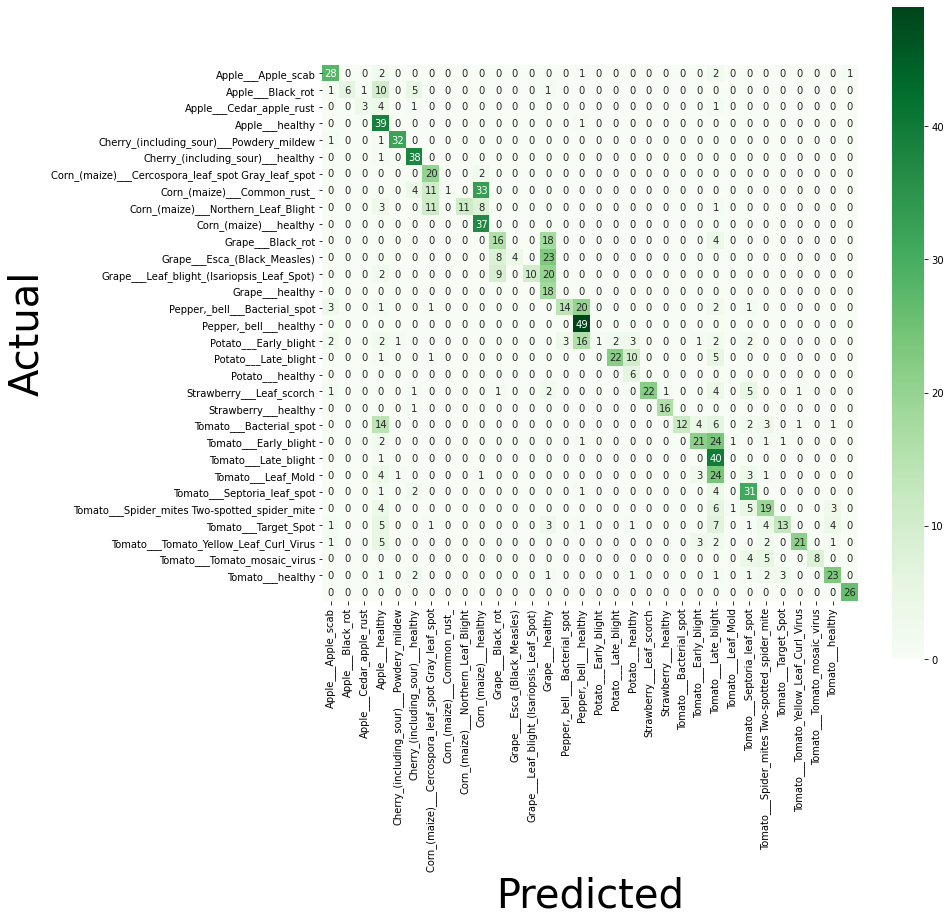

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
Y_pred = model.predict(x_test)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12,12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens,annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [30]:

test_generator.reset()
predictions = model.predict_generator(test_generator, steps=len(test_generator))
y = np.argmax(predictions, axis=1)

print('Classification Report')
cr = classification_report(y_true=test_generator.classes, y_pred=y, target_names=test_generator.class_indices)
print(cr)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Classification Report
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      1.00      1.00        25
                                 Apple___Black_rot       1.00      1.00      1.00        25
                          Apple___Cedar_apple_rust       1.00      1.00      1.00        11
                                   Apple___healthy       1.00      1.00      1.00        66
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00        42
                 Cherry_(including_sour)___healthy       1.00      0.97      0.99        34
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.81      1.00      0.89        21
                       Corn_(maize)___Common_rust_       1.00      0.92      0.96        48
               Corn_(maize)___Northern_Leaf_Blight       1.00      0.95      0.97        39
                            Corn_(maize)___healthy       

[INFO] Plotting model accuracy and Loss


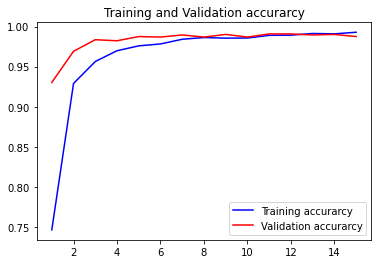

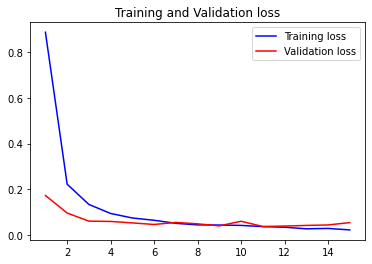

[INFO] Calculating model accuracy
34/34 [==============================] - 8s 129ms/step - loss: 1.8303 - accuracy: 0.5605
Test Accuracy: 56.048017740249634


In [31]:
Res_Plot_Test_Save('Efficientnetb7.h5')

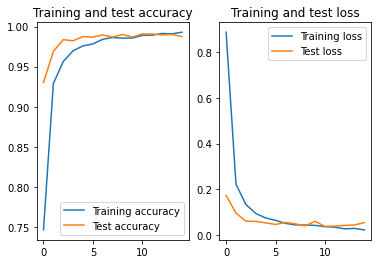

In [32]:
plt.subplot(1, 2, 1)
plt.title('Training and test accuracy')
plt.plot(history.epoch, history.history['accuracy'], label='Training accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label='Test accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Training and test loss')
plt.plot(history.epoch, history.history['loss'], label='Training loss')
plt.plot(history.epoch, history.history['val_loss'], label='Test loss')
plt.legend()

plt.show()